# Boston Housing Project

Project by: Akshat Johari

Data Source: [Kaggle](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)

In [103]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Reading data 
df = pd.read_csv('boston.csv')

Column descriptions:  

|Column|Description|
|---|---|
|CRIM| per capita crime rate by town|
|ZN| proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town|
|CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX| nitric oxides concentration (parts per 10 million)|
| RM| average number of rooms per dwelling|
| AGE| proportion of owner-occupied units built prior to 1940|
| DIS| weighted distances to five Boston employment centres|
| RAD| index of accessibility to radial highways|
| TAX| full-value property-tax rate per \\$10,000 |
|PTRATIO| pupil-teacher ratio by town|
| B| The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT| % lower status of the population|

Output variable: 

|Column|Description|
|---|---|
|MEDV| Median value of owner-occupied homes in \\$1000's |  


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.shape

(506, 14)

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [36]:
# Creating a quantile variable for median home value
df['Quantile'] = pd.cut(df['MEDV'], 4, labels = [1,2,3,4])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Quantile
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,3
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,2


In [51]:
pd.cut(df['MEDV'], 4, labels = [1,2,3,4]).value_counts().sort_index()

1    116
2    284
3     74
4     32
Name: MEDV, dtype: int64

In [45]:
# How many towns border the Charles river?
df['CHAS'].sum()

35

In [50]:
df[df['CHAS'] == 1]['Quantile'].value_counts().sort_index()

1     3
2    20
3     5
4     7
Name: Quantile, dtype: int64

### Data Visualization

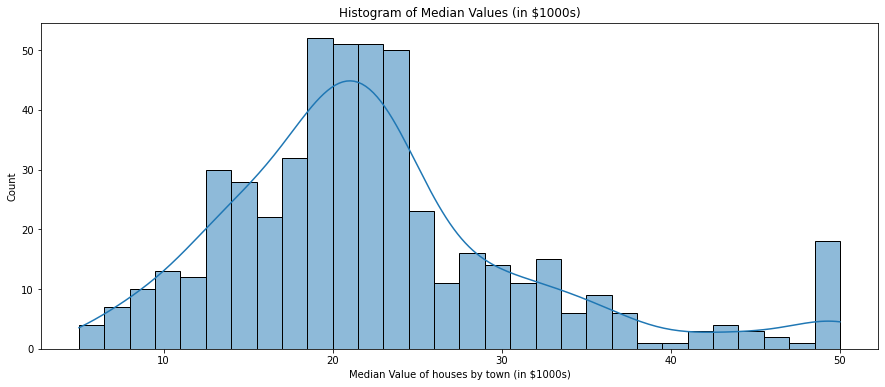

In [22]:
plt.figure(figsize = [15,8])
sns.histplot(data = df, x = 'MEDV', bins = 30, kde = True)
plt.title('Histogram of Median Values (in $1000s)')
plt.xlabel('Median Value of houses by town (in $1000s)')
plt.show()

Most towns seem to have a median home value in the \\$150,000 - \\$250,000 range, with some outliers. The distribution curve seems somewhat normal, with a right skew.

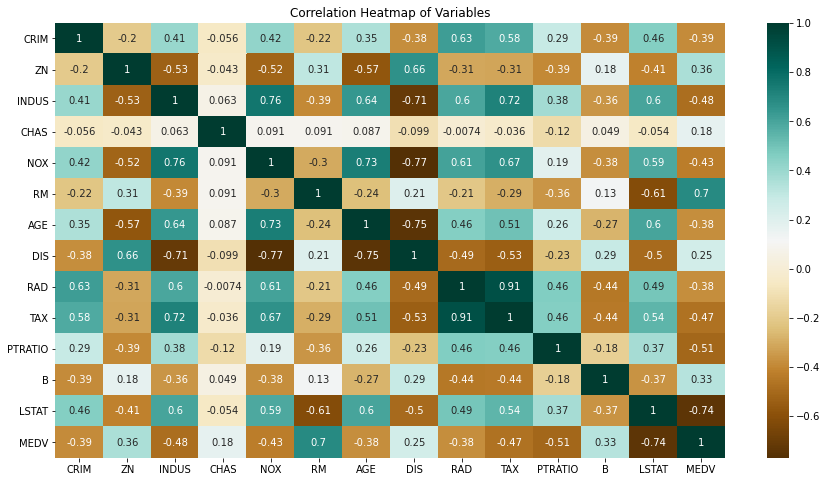

In [99]:
plt.figure(figsize = [15,8])
sns.heatmap(df.corr(), cmap = 'BrBG', annot = True)
plt.title('Correlation Heatmap of Variables')
plt.show()

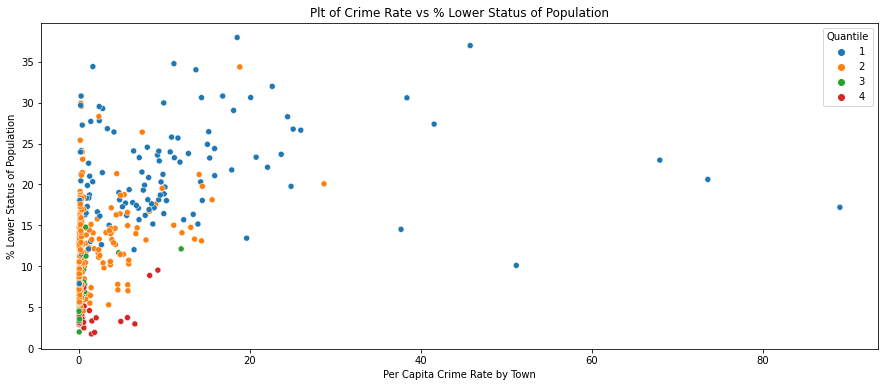

In [41]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df, x = 'CRIM', y = 'LSTAT', hue = 'Quantile')
plt.title('Plt of Crime Rate vs % Lower Status of Population')
plt.xlabel('Per Capita Crime Rate by Town')
plt.ylabel('% Lower Status of Population')
plt.show()

More crime in the less expensive towns? Most of the high-value towns have a smaller percentage of people from a lower economic strata, and low(er) crime rates as well.

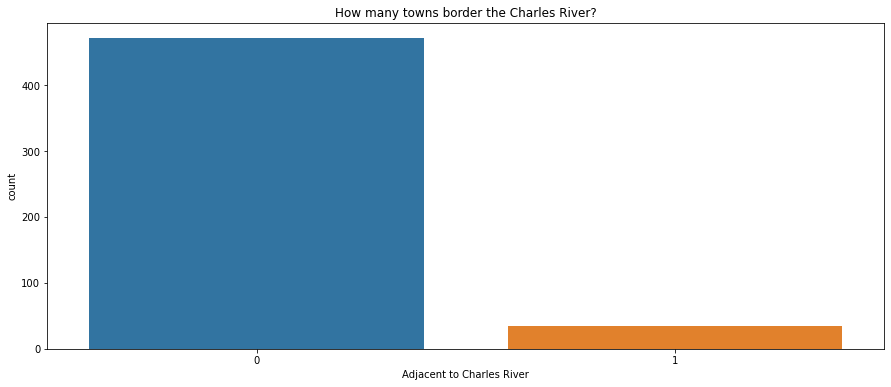

In [58]:
plt.figure(figsize = [15,8])
sns.countplot(data = df, x = 'CHAS')
plt.title('How many towns border the Charles River?')
plt.xlabel('Adjacent to Charles River')
plt.show()

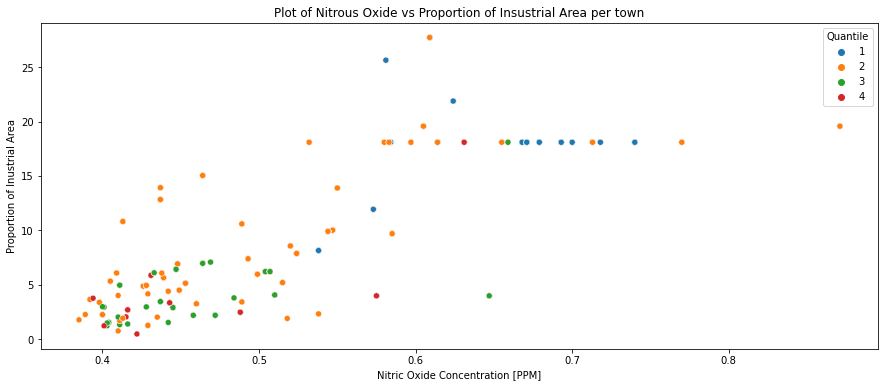

In [89]:
plt.figure(figsize = [15,8])
sns.scatterplot(data = df, x = 'NOX', y = 'INDUS', hue = 'Quantile')
plt.title('Plot of Nitrous Oxide vs Proportion of Insustrial Area per town')
plt.xlabel('Nitric Oxide Concentration [PPM]')
plt.ylabel('Proportion of Inustrial Area')
plt.show()

The towns with lower median home prices tend to have higher industrial proportions as well as higher Nitric Oxide values. 

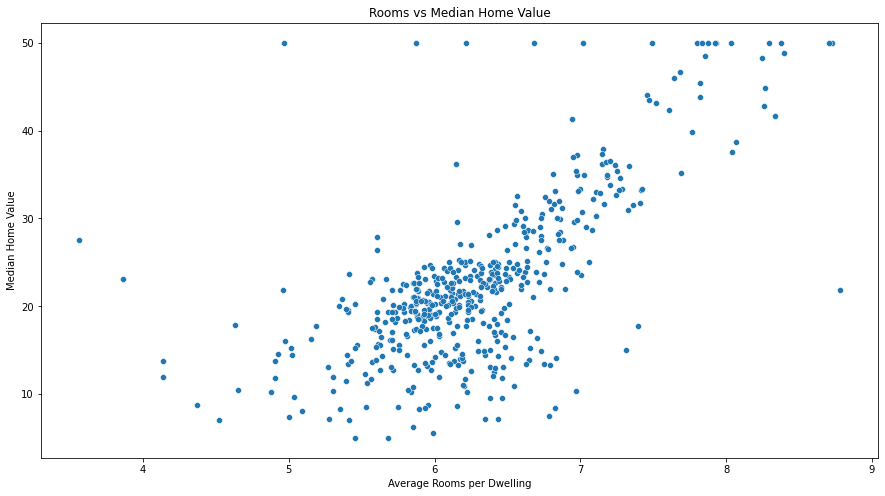

In [93]:
plt.figure(figsize = [15,8])
plt.title('Rooms vs Median Home Value')
sns.scatterplot(data = df, x = 'RM', y = 'MEDV')
plt.xlabel('Average Rooms per Dwelling')
plt.ylabel('Median Home Value')
plt.show()

More rooms generally tends to mean more square footage, and more expensive property value. Makes sense.

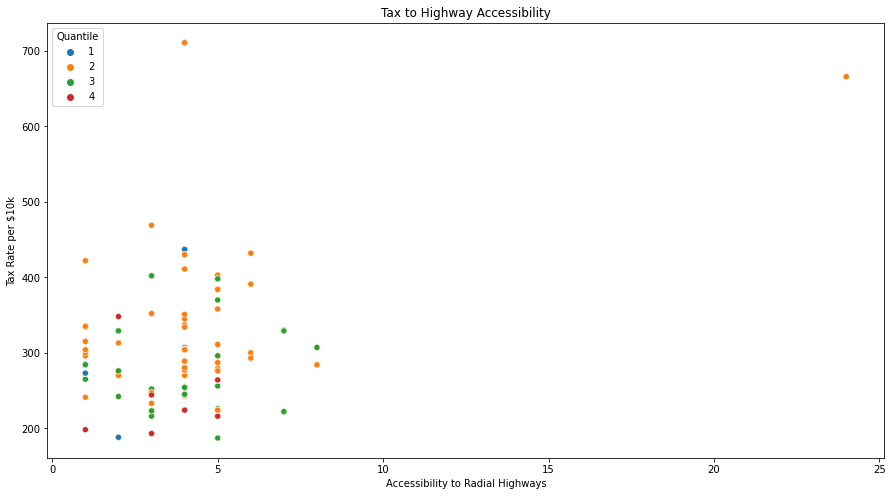

In [98]:
plt.figure(figsize = [15,8])
plt.title('Tax to Highway Accessibility')
sns.scatterplot(data = df, y = 'TAX', x = 'RAD', hue = 'Quantile')
plt.ylabel('Tax Rate per $10k')
plt.xlabel('Accessibility to Radial Highways')
plt.show()

More expensive towns seem to be slightly less accessible than others, although there still is a spread.

### Feature Engineering

In [107]:
# Dropping Quantile column - no longer needed
df.drop(columns = 'Quantile', inplace = True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [113]:
# Creating X and y datasets
X = df.drop(columns = 'MEDV')
y = df['MEDV']

print(X.shape, y.shape)

(506, 13) (506,)


In [114]:
# Train test split with a 25% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [119]:
stScaler = StandardScaler()

In [125]:
# Sclaing train and test datasets
X_train_scaled = pd.DataFrame(stScaler.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_scaled = pd.DataFrame(stScaler.fit_transform(X_test), index = X_test.index, columns = X_test.columns)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
37,-0.394867,-0.512587,-0.706892,-0.248243,-0.443841,-0.660991,-0.916426,0.021258,-0.508751,-0.749732,0.346592,0.429463,-0.516513
202,-0.401650,2.894940,-1.282153,-0.248243,-1.179641,1.881932,-1.830729,1.119824,-0.858267,-0.336786,-1.732592,0.413057,-1.322953
368,0.164969,-0.512587,1.070123,-0.248243,0.712414,-1.932452,1.156704,-1.202365,1.704853,1.566354,0.808632,0.198701,-1.301581
31,-0.246768,-0.512587,-0.387791,-0.248243,-0.102221,-0.340236,1.156704,0.134510,-0.625256,-0.582160,1.178265,0.211761,0.091879
401,1.249996,-0.512587,1.070123,-0.248243,1.255504,0.051317,1.156704,-1.088737,1.704853,1.566354,0.808632,0.429463,1.129138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-0.399186,1.655839,-0.800573,-0.248243,-1.267236,0.372072,-1.575574,1.612339,-0.392245,-0.665946,-0.854715,0.157686,-0.411077
109,-0.373547,-0.512587,-0.326312,-0.248243,-0.259892,-0.113395,0.844848,-0.632059,-0.508751,-0.121337,1.132061,0.368265,0.449505
395,0.608663,-0.512587,1.070123,-0.248243,1.255504,0.236257,1.114178,-1.017437,1.704853,1.566354,0.808632,0.376360,0.673200
480,0.272541,-0.512587,1.070123,-0.248243,-0.154778,-0.094612,-0.094262,-0.218604,1.704853,1.566354,0.808632,0.429463,-0.235826


In [130]:
modelPerformance = {}

### Linear Regression

In [131]:
lrModel = LinearRegression()
lrModel.fit(X_train_scaled, y_train)
y_pred = lrModel.predict(X_test_scaled)
modelPerformance['Linear Regression'] = mean_squared_error(y_pred, y_test, squared = False)
mean_squared_error(y_pred, y_test, squared = False)

5.206758081551697

### Decision Tree

In [133]:
dTModel = DecisionTreeRegressor()
dTModel.fit(X_train_scaled, y_train)
y_pred = dTModel.predict(X_test_scaled)
modelPerformance['Decision Tree'] = mean_squared_error(y_pred, y_test, squared = False)
mean_squared_error(y_pred, y_test, squared = False)

4.555363715739629